<a href="https://colab.research.google.com/github/Gary-Chen-cn/CK/blob/master/%EA%B8%B0%EB%A7%90_%EB%A0%88%ED%8F%AC%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip
# 강이지 고양이 사진 데이터 가져오기

--2022-11-29 06:58:31--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   233MB/s    in 0.3s    

2022-11-29 06:58:31 (233 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
#파일을 적절한 디렉토리에 압축 해제
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()



In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련세트 새우기
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#검증세트 새우기
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [ ]:
#디렉토리에서 부분 데이터 명칭 인쇄하기
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])


['cat.845.jpg', 'cat.644.jpg', 'cat.376.jpg', 'cat.545.jpg', 'cat.377.jpg', 'cat.669.jpg', 'cat.699.jpg', 'cat.858.jpg', 'cat.482.jpg', 'cat.756.jpg']
['dog.697.jpg', 'dog.57.jpg', 'dog.600.jpg', 'dog.476.jpg', 'dog.700.jpg', 'dog.340.jpg', 'dog.343.jpg', 'dog.747.jpg', 'dog.353.jpg', 'dog.823.jpg']


In [ ]:
#데이터 세트 크기 인쇄하기
print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir(  train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))


total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


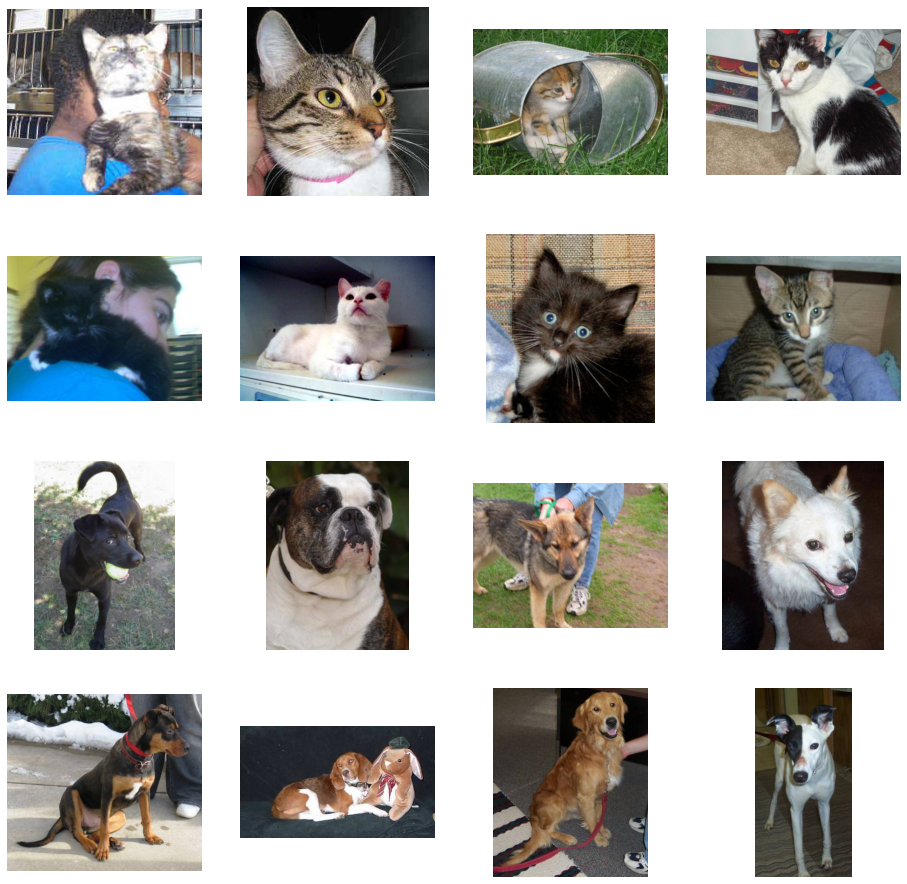

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# 그래프의 매개변수; 4x4 구성으로 이미지를 인쇄하기
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images
# matplotlib 그림을 설정하고 4x4 사진에 맞게 크기를 조정
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # 서브플롯 설정; 서브플롯 인덱스는 1에서 시작하기
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # 입력 모양은 3바이트 색상의 이미지 150x150의 원하는 크기이다.
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # 결과를 평면화하여 DNN에 공급
    tf.keras.layers.Flatten(), 
    # 512 뉴런 히든 레이어
    tf.keras.layers.Dense(512, activation='relu'), 
   # 오직 1개의 출력 뉴런. 0-1 사이의 값을 포함합니다. 여기서 1 클래스('고양이')는 0이고 다른 클래스('개')는 1입니다.
    tf.keras.layers.Dense(1, activation='sigmoid')  
])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# train_datagen 생성기를 사용하여 20개 배치의 흐름 훈련 이미지
train_generator = train_datagen.flow_from_directory(train_dir,
            batch_size=20,
            class_mode='binary',
            target_size=(150, 150))     
# test_datagen 생성기를 사용하여 20개 배치의 흐름 유효성 검증 이미지
validation_generator =  test_datagen.flow_from_directory(validation_dir,
           batch_size=20,
           class_mode  = 'binary',
           target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#훈련 시키지
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
100/100 - 75s - loss: 0.7288 - acc: 0.5935 - val_loss: 0.7185 - val_acc: 0.5450 - 75s/epoch - 745ms/step
Epoch 2/15
100/100 - 72s - loss: 0.5958 - acc: 0.6885 - val_loss: 0.5942 - val_acc: 0.6790 - 72s/epoch - 720ms/step
Epoch 3/15
100/100 - 68s - loss: 0.5107 - acc: 0.7570 - val_loss: 0.6034 - val_acc: 0.6930 - 68s/epoch - 683ms/step
Epoch 4/15
100/100 - 71s - loss: 0.4275 - acc: 0.8000 - val_loss: 0.6766 - val_acc: 0.7000 - 71s/epoch - 710ms/step
Epoch 5/15
100/100 - 72s - loss: 0.3376 - acc: 0.8445 - val_loss: 0.7384 - val_acc: 0.6920 - 72s/epoch - 721ms/step
Epoch 6/15
100/100 - 70s - loss: 0.2463 - acc: 0.8965 - val_loss: 0.6522 - val_acc: 0.7250 - 70s/epoch - 697ms/step
Epoch 7/15
100/100 - 71s - loss: 0.1596 - acc: 0.9345 - val_loss: 0.7605 - val_acc: 0.7370 - 71s/epoch - 709ms/step
Epoch 8/15
100/100 - 68s - loss: 0.1165 - acc: 0.9505 - val_loss: 1.0795 - val_acc: 0.7180 - 68s/epoch - 676ms/step
Epoch 9/15
100/100 - 68s - loss: 0.0842 - acc: 0.9690 - val_loss: 1.1934

Text(0.5, 1.0, 'Training and validation loss')

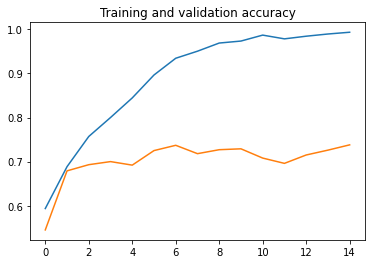

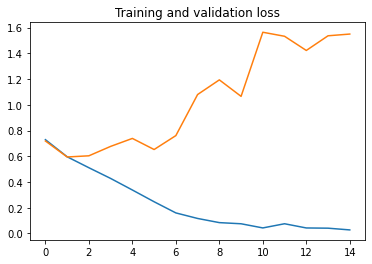

In [ ]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # epoch 수 얻기

#epoch당 훈련 및 검증 정확도 그린 그리기
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#epoch당 훈련 및 검증 순실 그린 그리기
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )


In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # 이미지 예측
 path='/content/sample_data/cat_dog_test/' + fn
from keras.utils import image_utils
img=image_utils.load_img(img_path,target_size=(150,150))
  
x=image_utils.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images, batch_size=10)
  
print(classes[0])
  
if classes[0]>0:
    print(fn + " is a dog")
    
else:
    print(fn + " is a cat")
    #결과 검증


Saving 贾亦真.jpeg to 贾亦真.jpeg
1/1 [==============================] - 0s 33ms/step
[1.]
贾亦真.jpeg is a dog


In [ ]:
from google.colab import drive
drive.mount('/content/drive')